2.8.2
After reshape train data set shape:
 (1480, 210, 1)
After reshape train data set shape:
 (370, 210, 1)
Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 204, 64)           512       
                                                                 
 dropout_20 (Dropout)        (None, 204, 64)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 202, 32)           6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 201, 16)           1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 100, 16)          0         
                                                                 
 flatten_20 (Flatten)        (None, 1600)              0         
           

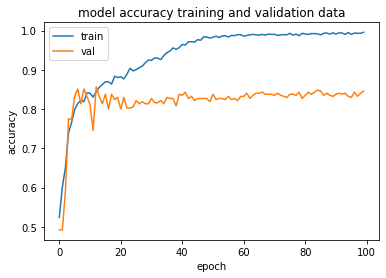

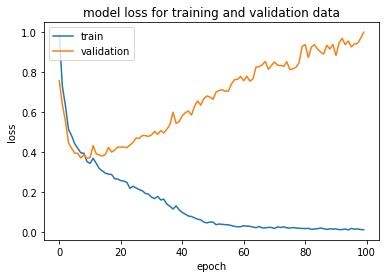

After reshape train data set shape:
 (1480, 210, 1)
After reshape train data set shape:
 (370, 210, 1)
Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 204, 64)           512       
                                                                 
 dropout_21 (Dropout)        (None, 204, 64)           0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 202, 32)           6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 201, 16)           1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 100, 16)          0         
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                 

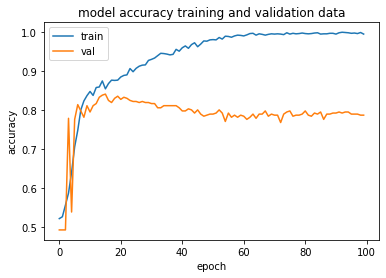

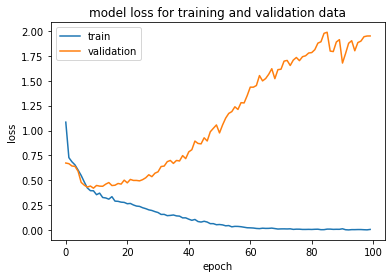

In [55]:
from inspect import modulesbyfile
# -*- coding: utf-8 -*-
"""Improved.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1FAGStFxzdeJVHgjsE3-lce31VDnZTq25
"""

# Commented out IPython magic to ensure Python compatibility.
##Package Import for Anticancer Peptides 
import numpy as np 
from sklearn.utils import shuffle
import random
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import metrics



import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

#!pip install scikit-plot
#import scikitplot as skplt

#AMINO ACID COMPOSITION FOR ACP PREDICTION - 20 DIMENSIONAL FEATURE VECTOR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import random_state

def AAC_740():
    df = pd.read_csv("AAC740.csv",header=None)
    df.columns=['label','AAC_A','AAC_C','AAC_D','AAC_E','AAC_F','AAC_G','AAC_H','AAC_I','AAC_K','AAC_L','AAC_M','AAC_N','AAC_P','AAC_Q','AAC_R','AAC_S','AAC_T','AAC_V','AAC_W','AAC_Y']
    data1 = df.drop(columns='label',axis=1)
    X_aac = np.array(data1)
    label=df['label']
    return np.array(X_aac),label

def AAC_240():
    df = pd.read_csv("AAC240.csv",header=None)
    df.columns=['label','AAC_A','AAC_C','AAC_D','AAC_E','AAC_F','AAC_G','AAC_H','AAC_I','AAC_K','AAC_L','AAC_M','AAC_N','AAC_P','AAC_Q','AAC_R','AAC_S','AAC_T','AAC_V','AAC_W','AAC_Y']
    data2 = df.drop(columns='label',axis=1)
    X_aac = np.array(data2)
    label=df['label']
    return np.array(X_aac),label

def prepare_feature_acp740():
    label = []
    protein_seq_dict = {}
    protein_index = 0
    with open('acp740.txt', 'r') as fp:
        for line in fp:
            if line[0] == '>':
                values = line[1:].strip().split('|')
                label_temp = values[1]
#                proteinName = values[0]
                if label_temp == '1':
                    label.append(1)
                else:
                    label.append(0)
            else:
                seq = line[:-1]
                protein_seq_dict[protein_index] = seq
                protein_index = protein_index + 1
    bpf=[]
    for i in protein_seq_dict:  # and protein_fea_dict.has_key(protein) and RNA_fea_dict.has_key(RNA):
        bpf_feature = BPF(protein_seq_dict[i])
        bpf.append(bpf_feature)
    return np.array(bpf), label

def prepare_feature_acp240():
    label = []
    protein_seq_dict = {}
    protein_index = 1
    with open('acp240.txt', 'r') as fp:
        for line in fp:
            if line[0] == '>':
                values = line[1:].strip().split('|')
                label_temp = values[1]
#                protein = values[0]
                if label_temp=='1':
                    label.append(1)
                else:
                    label.append(0)
            else:
                seq = line[:-1]
                protein_seq_dict[protein_index] = seq
                protein_index = protein_index + 1
    bpf = []
    # get protein feature
    for i in protein_seq_dict:  # and protein_fea_dict.has_key(protein) and RNA_fea_dict.has_key(RNA):

        bpf_feature = BPF(protein_seq_dict[i])
        bpf.append(bpf_feature)
        protein_index = protein_index + 1

    return np.array(bpf), label

def BPF(seq_temp):
    seq = seq_temp
#    chars = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    fea = []
    tem_vec =[]
    k = 7
    for i in range(k):
        if seq[i] =='A':
            tem_vec = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='C':
            tem_vec = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='D':
            tem_vec = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='E':
            tem_vec = [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='F':
            tem_vec = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='G':
            tem_vec = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='H':
            tem_vec = [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='I':
            tem_vec = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='K':
            tem_vec = [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='L':
            tem_vec = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='M':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='N':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
        elif seq[i]=='P':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
        elif seq[i]=='Q':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
        elif seq[i]=='R':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
        elif seq[i]=='S':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
        elif seq[i]=='T':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
        elif seq[i]=='V':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
        elif seq[i]=='W':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        elif seq[i]=='Y':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
        fea = fea + tem_vec
    return fea

def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp)
    sensitivity = float(tp) / (tp + fn)
    specificity = float(tn) / (tn + fp)
    MCC = float(tp * tn - fp * fn) / (np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
    return acc, precision, sensitivity, specificity, MCC


def oversamp_pos(X_result, p):
    add_num = int(len(X_result)*p)
#    print(add_num)
#if(1):
    X_add_all = []
    for i in range(add_num):
        idx_ram = random.randint(0,X_result.shape[0]-1)
        X_sel = X_result[idx_ram,:]
        value1 = np.zeros((1,140))
        value2 = np.random.uniform(0, 1, (1, fea_num - 160))
        value3 = np.random.uniform(0, 1, (1, fea_num-190))        
        value = np.concatenate((value1, value2,value3),axis = 1)
#        value = np.random.normal(0,1,(1,483)) #Normal Distribution for Over Sampling
#        value = np.random.poisson(6, size=(1,483)) #Poission Distribution for Over Sampling
#        value = np.random.exponential(10, size=(1,483)) #Exponential Distribution for Over Sampling
        add_value = value*delta*X_sel
#        add_value[0,0] = 0 # ORFLen not be added
        X_add = X_sel + add_value
        X_add = np.squeeze(X_add)
        X_add_all.append(X_add)
    X_add_all = np.array(X_add_all)   
#    label_add = np.ones((add_num,),dtype = int)
    return X_add_all#,label_add

def oversamp_neg(X_result, p):
    add_num = int(len(X_result)*p)
#    print(add_num)

    X_add_all = []
    for i in range(add_num):
        idx_ram = random.randint(0,X_result.shape[0]-1)
        X_sel = X_result[idx_ram,:]
        value1 = np.zeros((1,140))
        value2 = np.random.uniform(0, 1, (1, fea_num - 160)) #均匀分布
        value3 = np.random.uniform(0, 1, (1, fea_num-190))        
        value = np.concatenate((value1, value2,value3),axis = 1)
#        value = np.random.normal(0,1,(1,483)) #正态分布
#        value = np.random.poisson(6, size=(1,483)) #泊松分布
#        value = np.random.exponential(10, size=(1,483)) #指数分布
        add_value = value*delta*X_sel
#        add_value[0,0] = 0 # ORFLen not be added
        X_add = X_sel + add_value
        X_add = np.squeeze(X_add)
        X_add_all.append(X_add)
    X_add_all = np.array(X_add_all)   
#    label_add = np.zeros((add_num,),dtype = int) 
    return X_add_all#,label_add

def build_model():
    # define parameters
    np.random.seed(0)
    random.seed(0)
    # x_train, x_test, y_train, y_test = train_test_split(X, label, test_size=0.1, random_state=1024)
    num_cross_val = 2  # 5-fold
    all_performance_lstm = []
    all_prob = {}
    all_prob[0] = []

    for fold in range(num_cross_val):
        # train = np.array([x for i, x in enumerate(bpf_fea) if i % num_cross_val != fold])
        # test = np.array([x for i, x in enumerate(bpf_fea) if i % num_cross_val == fold])
        # train = np.array([x for i, x in enumerate(kmer_fea) if i % num_cross_val != fold])
        # test = np.array([x for i, x in enumerate(kmer_fea) if i % num_cross_val == fold])
        train = np.array([x for i, x in enumerate(X) if i % num_cross_val != fold])
        test = np.array([x for i, x in enumerate(X) if i % num_cross_val == fold])
        train_label = np.array([x for i, x in enumerate(label) if i % num_cross_val != fold])
        test_label = np.array([x for i, x in enumerate(label) if i % num_cross_val == fold])
        real_labels = []
        for val in test_label:
            if val == 1:
                real_labels.append(1)
            else:
                real_labels.append(0)

        # augment the train data
        idx_pos = (train_label == 1)
        idx_neg = (train_label == 0)
        X_pos = train[idx_pos,:]
        X_neg = train[idx_neg,:]
        X_pos_add = oversamp_pos(X_pos, augtimes)
        X_neg_add = oversamp_neg(X_neg, augtimes)
        X_pos_new = np.concatenate((X_pos, X_pos_add))
        X_neg_new = np.concatenate((X_neg, X_neg_add))
        label_pos = np.ones((X_pos_new.shape[0],),dtype = int) 
        label_neg = np.zeros((X_neg_new.shape[0],),dtype = int) 
        
        train_new = np.concatenate((X_pos_new, X_neg_new))
        train_label_new = np.concatenate((label_pos, label_neg))
#        print(train_new)



#CONVULATION MODEL FOR PREDICTION

        sample_size = train_new.shape[0]
        time_steps = train_new.shape[1]
        input_dimension = 1

        train_data_reshaped = train_new.reshape(sample_size,time_steps,input_dimension)
        print("After reshape train data set shape:\n", train_data_reshaped.shape)

        test_data_reshaped = test.reshape(test.shape[0],test.shape[1],1)
        print("After reshape train data set shape:\n", test_data_reshaped.shape)

        n_timesteps = train_data_reshaped.shape[1] #13
        n_features  = train_data_reshaped.shape[2] #1 
        model = keras.Sequential(name="model_conv1D")
        model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
        model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
        model.add(keras.layers.Dropout(0.5))
        model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
        
        model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
        
        model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
        model.add(keras.layers.Dense(n_features, name="Dense_2"))

        model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer='Adam',metrics=['accuracy'])
        model.summary()


        # Store training stats
        history = model.fit(train_data_reshaped, train_label_new, epochs=100,
                    validation_data=(test_data_reshaped,test_label))
        


        #Plot for CNN -Overfitting Problem

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy training and validation data')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.savefig("accuracy plot for 100 epoch")
        plt.show()

        # "Loss"
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss for training and validation data')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.savefig("Loss for training and validation data for 100 epoch")
        plt.show()   

#Models for Prediction

#        clf = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100),alpha = 0.1,activation = 'tanh', random_state=120,max_iter=500,solver='adam',learning_rate='adaptive')
#        clf = RandomForestClassifier(random_state=120,n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features='auto',bootstrap=False)   
#        clf = ExtraTreesClassifier(random_state=120,n_estimators=400,max_depth=32,min_samples_split=10,min_samples_leaf=1,max_features='auto',bootstrap=False)
#        clf = KNeighborsClassifier(n_neighbors =9)
#        clf = svm.SVC(kernel="linear") 


#Boosting Algorithms for prediction

#        base_classifier = RandomForestClassifier(random_state=120,n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features='auto',bootstrap=False)
#        clf = AdaBoostClassifier(base_estimator=base_classifier,random_state = 121,n_estimators=406,learning_rate=0.04)
#        clf = GradientBoostingClassifier(random_state=121, n_estimators=350, learning_rate=0.1, loss='deviance')



#        model = clf.fit(train_new, train_label_new)
#        y_pred_xgb = model.predict(test)
        
#Predict Probabilities        
#        pred_prob1 = model.predict_proba(test)
#        print(np.array(pred_prob1))

#        acc, precision, sensitivity, specificity, MCC = calculate_performace(len(real_labels), y_pred_xgb, real_labels)
#        print(acc, precision, sensitivity, specificity, MCC)
#        all_performance_lstm.append([acc, precision, sensitivity, specificity, MCC])
#        skplt.metrics.plot_roc_curve(test_label,pred_prob1, title="ACP ROC Curve", figsize=(12,6));
#        print('Best Parameter found \n',clf.best_params_)



        
#    print('mean performance of ACP_BOOST')

#    print(np.mean(np.array(all_performance_lstm), axis=0))



#    skplt.metrics.plot_roc_curve(test_label,pred_prob1, title="ACP ROC Curve", figsize=(9,6));
#    skplt.metrics.plot_precision_recall_curve(test_label, pred_prob1,
#                       title="AntiCancer Peptide-Precision-Recall Curve", figsize=(12,6));
#    skplt.metrics.plot_ks_statistic(test_label,pred_prob1, figsize=(4,4));


    

#Confusion Matrix for Visulization of Classification using Different Models

#    ConfusionMatrixDisplay.from_predictions(test_label,y_pred_xgb)
#    plt.show
#    plt.savefig("Confusion_Matrix_RF")
"""
        model = keras.Sequential([
        keras.layers.Input(shape=(train_new.shape[1],)),                  
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
         ], name="MLP_model")
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer='Adam',
                metrics=['accuracy'])
    model.summary()

    Epochs = 100

    history = model.fit(train_new, train_label_new, epochs=Epochs,
                    validation_data = (test, test_label), verbose=1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy training and validation data')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig("accuracy plot for 100 epoch")
    plt.show()

    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for training and validation data')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("Loss for training and validation data for 100 epoch")
    plt.show()   

"""


dataset = 1 #1.acp740   2.acp240
peptidelen = 50 #50  #60

if dataset == 1:
    delta = 0.02  #acp740
    augtimes = 3
    bpf, label = prepare_feature_acp740()
    X_aac, label = AAC_740()
    if peptidelen == 40:
        data = pickle.load(open('data740_40_50.pkl', 'rb'))
    elif peptidelen == 50:
        data = pickle.load(open('data740_50_50.pkl', 'rb'))
    elif peptidelen == 60:      
        data = pickle.load(open('data740_60_50.pkl', 'rb'))
else:
    delta = 0.005  #acp240
    augtimes = 3
    bpf, label = prepare_feature_acp240()
    X_aac, label = AAC_240()
    if peptidelen == 40:
        data = pickle.load(open('data240_40_50.pkl', 'rb'))
    elif peptidelen == 50:
        data = pickle.load(open('data240_50_50.pkl', 'rb'))
    elif peptidelen == 60:      
        data = pickle.load(open('data240_60_50.pkl', 'rb'))    

X_aa = data['X']
X_aa = np.array(X_aa)
X = np.concatenate((bpf, X_aa,X_aac), axis=1)     
fea_num = X.shape[1]
build_model() 

